## Sequence dataset generation

### Reading data

Reading pre-processed Uniprot data for all organisms:

In [191]:
from subpred.util import load_df

sequences = load_df("uniprot")
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
A0A0C5B5G6,MT-RNR1,Mitochondrial-derived peptide MOTS-c (Mitochon...,True,1,MRWQEMGYIFYPRKLR,9606
A0A1B0GTW7,CIROP LMLN2,Ciliated left-right organizer metallopeptidase...,True,1,MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...,9606
A0JNW5,BLTP3B KIAA0701 SHIP164 UHRF1BP1L,Bridge-like lipid transfer protein family memb...,True,1,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...,9606
A0JP26,POTEB3,POTE ankyrin domain family member B3,True,1,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...,9606
A0PK11,CLRN2,Clarin-2,True,1,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,9606
...,...,...,...,...,...,...
X5L4R4,NOD-2,Nucleotide-binding oligomerization domain-cont...,False,2,MSPGCYKGWPFNCHLSHEEDKRRNETLLQEAETSNLQITASFVSGL...,586796
X5MBL2,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,KVLYDRAFNSSDDQSALVYLLLKEKDKWADRIFIEHKYYLNGYWLD...,3352
X5MFI4,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,MDEDVLCKGPLHGGSARSLKGSLKRLKRIMESLNDGLIFMGGAVSA...,3352


### Selecting organism

Filtering for *E. Coli* Strain K12: 

In [192]:
sequences = sequences[sequences.organism_id == 83333]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333
P33668,ybbC b0498 JW0487,Uncharacterized protein YbbC,True,2,MKYSSIFSMLSFFILFACNETAVYGSDENIIFMRYVEKLHLDKYSV...,83333


### Filtering

Keeping proteins that have been manually reviewed, or have sequence evidence at protein level:

In [193]:
sequences = sequences[(sequences.protein_existence == 1) | (sequences.reviewed)]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Sequence clustering the proteins:

The clustering at 70% sequence identity does not remove a lot of proteins for *E. coli*. This is different for other organisms. 

In [194]:
from subpred.cdhit import cd_hit

clusters = cd_hit(sequences=sequences.sequence, identity_threshold=70)
sequences = sequences.loc[clusters]
sequences

cd-hit: clustered 3277 sequences into 3236 clusters at threshold 70


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P77564,ydhW b1672 JW1662,Uncharacterized protein YdhW,True,2,MGKMNHQDELPLAKVSEVDEAKRQWLQGMRHPVDTVTEPEPAEILA...,83333
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Filtering for transmembrane transporters using GO

#### Loading all GO Uniprot annotations

Read pre-processed Uniprot GO annotations:

In [195]:
go_annotations_uniprot = load_df("go")
go_annotations_uniprot

,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A009FND8,enables,GO:0000166,IEA,F
1,A0A009FND8,enables,GO:0005524,IEA,F
2,A0A009FND8,enables,GO:0051082,IEA,F
3,A0A009FND8,enables,GO:0140662,IEA,F
4,A0A009FND8,involved_in,GO:0006457,IEA,P
...,...,...,...,...,...
7452013,Z9JND5,enables,GO:0000166,IEA,F
7452014,Z9JND5,enables,GO:0005524,IEA,F
7452015,Z9JND5,enables,GO:0051082,IEA,F
7452016,Z9JND5,enables,GO:0140662,IEA,F


#### Dataset of transmembrane transport GO terms in E Coli

- Used to filter proteins for transmembrane transporters

**Creating dataset of transporter GO term annotations**

Filter for GO terms that are descendants of "transmembrane transporter activity

GO annotations for the clustered sequence dataset from *E Coli.*

In [196]:
from subpred.ontology import GeneOntology, GO_FILE

go_owl = GeneOntology(GO_FILE)
transmembrane_transport_go_terms = go_owl.get_descendants(go_owl.get_identifier("transmembrane transporter activity"))
# filter GO annotations for descendants of transmembrane transporter activity
go_annotations_tmtp = go_annotations_uniprot[go_annotations_uniprot.go_id.isin(transmembrane_transport_go_terms)].reset_index(drop=True)
go_annotations_tmtp

,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A014M993,enables,GO:0015288,IEA,F
1,A0A014M993,enables,GO:0015481,IEA,F
2,A0A014M993,enables,GO:0042958,IEA,F
3,A0A022PEV8,enables,GO:0015288,IEA,F
4,A0A022PEV8,enables,GO:0015481,IEA,F
...,...,...,...,...,...
94155,X5M917,enables,GO:0022857,IBA,F
94156,Z4YKJ7,enables,GO:0015172,IEA,F
94157,Z4YKJ7,enables,GO:0015179,IEA,F
94158,Z4YKJ7,enables,GO:0015293,IEA,F


In [197]:
# add ancestors of all remaining terms
go_annotations_tmtp = go_annotations_tmtp.assign(ancestors = go_annotations_tmtp.go_id.transform(lambda go_id: go_owl.get_ancestors(go_id)))
assert go_annotations_tmtp.apply(lambda row: row.go_id in row.ancestors, axis=1).all()
go_annotations_tmtp

,Uniprot,qualifier,go_id,evidence_code,aspect,ancestors
0,A0A014M993,enables,GO:0015288,IEA,F,"{GO:0003674, GO:0015288, GO:0022829, GO:002285..."
1,A0A014M993,enables,GO:0015481,IEA,F,"{GO:0015154, GO:0003674, GO:0005363, GO:001528..."
2,A0A014M993,enables,GO:0042958,IEA,F,"{GO:0003674, GO:0022884, GO:0015144, GO:002285..."
3,A0A022PEV8,enables,GO:0015288,IEA,F,"{GO:0003674, GO:0015288, GO:0022829, GO:002285..."
4,A0A022PEV8,enables,GO:0015481,IEA,F,"{GO:0015154, GO:0003674, GO:0005363, GO:001528..."
...,...,...,...,...,...,...
94155,X5M917,enables,GO:0022857,IBA,F,"{GO:0005215, GO:0003674, GO:0022857}"
94156,Z4YKJ7,enables,GO:0015172,IEA,F,"{GO:0003674, GO:0005342, GO:0046943, GO:002285..."
94157,Z4YKJ7,enables,GO:0015179,IEA,F,"{GO:0003674, GO:0005342, GO:0046943, GO:002285..."
94158,Z4YKJ7,enables,GO:0015293,IEA,F,"{GO:0003674, GO:0015291, GO:0022857, GO:000521..."


In [198]:
# add ancestor annotations
go_annotations_tmtp = go_annotations_tmtp.drop("go_id", axis=1).rename(columns={"ancestors": "go_id"}).explode("go_id")
go_annotations_tmtp

,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0003674
0,A0A014M993,enables,IEA,F,GO:0015288
0,A0A014M993,enables,IEA,F,GO:0022829
0,A0A014M993,enables,IEA,F,GO:0022857
0,A0A014M993,enables,IEA,F,GO:0022803
...,...,...,...,...,...
94159,Z4YKJ7,enables,IEA,F,GO:0005283
94159,Z4YKJ7,enables,IEA,F,GO:0008514
94159,Z4YKJ7,enables,IEA,F,GO:0015501
94159,Z4YKJ7,enables,IEA,F,GO:0022853


In [199]:
# filter GO annotations and their ancestors for descendants of transmembrane transporter activity again
go_annotations_tmtp = go_annotations_tmtp[go_annotations_tmtp.go_id.isin(transmembrane_transport_go_terms)].reset_index(drop=True)
go_annotations_tmtp = go_annotations_tmtp.drop_duplicates().reset_index(drop=True)
go_annotations_tmtp

,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0015288
1,A0A014M993,enables,IEA,F,GO:0022829
2,A0A014M993,enables,IEA,F,GO:0022857
3,A0A014M993,enables,IEA,F,GO:0022803
4,A0A014M993,enables,IEA,F,GO:0015267
...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0005283
581848,Z4YKJ7,enables,IEA,F,GO:0008514
581849,Z4YKJ7,enables,IEA,F,GO:0015501
581850,Z4YKJ7,enables,IEA,F,GO:0022853


In [200]:
# annotate with labels
go_annotations_tmtp = go_annotations_tmtp.assign(go_term = go_annotations_tmtp.go_id.transform(go_owl.get_label))
go_annotations_tmtp

,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0015288,porin activity
1,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
2,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
3,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
4,A0A014M993,enables,IEA,F,GO:0015267,channel activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0005283,amino acid:sodium symporter activity
581848,Z4YKJ7,enables,IEA,F,GO:0008514,organic anion transmembrane transporter activity
581849,Z4YKJ7,enables,IEA,F,GO:0015501,glutamate:sodium symporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0022853,active ion transmembrane transporter activity


In [201]:
# Filtering for qualifier. How many samples do we lose?
print(
    f"Percentage of transmembrane transporter annotations with enables qualifier: {go_annotations_tmtp[go_annotations_tmtp.qualifier == 'enables'].shape[0] / go_annotations_tmtp.shape[0] * 100:.3f}%"
)
go_annotations_tmtp = go_annotations_tmtp[go_annotations_tmtp.qualifier == "enables"]
go_annotations_tmtp

Percentage of transmembrane transporter annotations with enables qualifier: 97.408%


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0015288,porin activity
1,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
2,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
3,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
4,A0A014M993,enables,IEA,F,GO:0015267,channel activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0005283,amino acid:sodium symporter activity
581848,Z4YKJ7,enables,IEA,F,GO:0008514,organic anion transmembrane transporter activity
581849,Z4YKJ7,enables,IEA,F,GO:0015501,glutamate:sodium symporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0022853,active ion transmembrane transporter activity


Before filtering for the electronically inferred IEA annotations, we will only keep annotations for the clustered *E. coli* sequence dataset above, to see what the actual difference in sample count is. *E. coli* is a model organism, and therefore there should be more experimentally verified annotations compared to the thousands of other organisms in the dataset with similar proteins. 

The percentage of IEA annotations in *E. coli* should be much lower than for the average Uniprot organism.

In [202]:
assert not sequences.duplicated().any()
f"% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: {sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)].shape[0]/sequences.shape[0]*100:.2f}%"

'% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: 14.52%'

In [203]:
go_annotations_tmtp = go_annotations_tmtp[go_annotations_tmtp.Uniprot.isin(sequences.index)].reset_index(drop=True)
go_annotations_tmtp

,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0005253,anion channel activity
1,A5A627,enables,IDA,F,GO:0008509,anion transmembrane transporter activity
2,A5A627,enables,IDA,F,GO:0022857,transmembrane transporter activity
3,A5A627,enables,IDA,F,GO:0022803,passive transmembrane transporter activity
4,A5A627,enables,IDA,F,GO:0005216,ion channel activity
...,...,...,...,...,...,...
7374,Q6BEX0,enables,IEA,F,GO:0051119,sugar transmembrane transporter activity
7375,Q6BEX0,enables,IEA,F,GO:0043211,ABC-type carbohydrate transporter activity
7376,Q6BEX0,enables,IEA,F,GO:0042626,ATPase-coupled transmembrane transporter activity
7377,Q6BEX0,enables,IEA,F,GO:0022804,active transmembrane transporter activity


<AxesSubplot:>

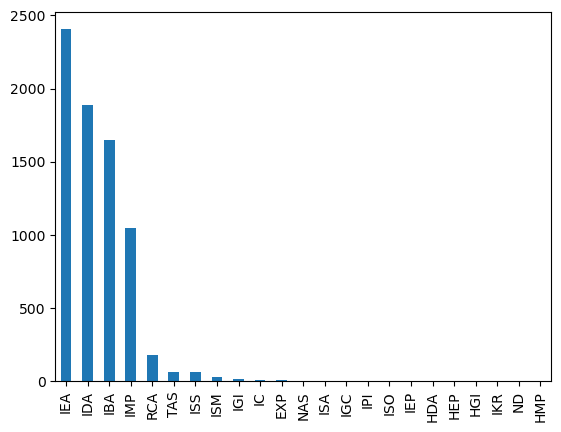

In [204]:
# filter for evidence code. how many samples do we lose?
go_annotations_tmtp.evidence_code.value_counts().plot.bar()

Most annotations have experimental evidence!

<AxesSubplot:>

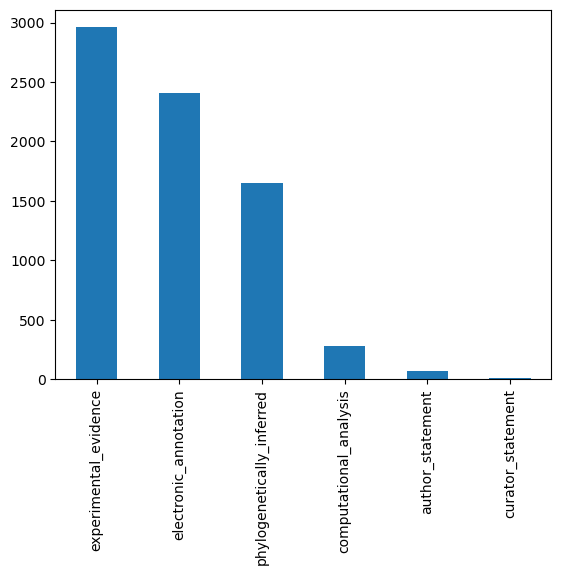

In [205]:
from subpred.ontology import EVIDENCE_CODE_TO_DESCRIPTION
go_annotations_tmtp.evidence_code.map(EVIDENCE_CODE_TO_DESCRIPTION).value_counts().plot.bar()

Another point is that the GO annotation dataset also contains Uniprot annotations assigned by InterPro. There can be cases where the same annotation is in the dataset twice, where one of those annotations has an IEA annotation while the other one does not. What is the actual difference?

In [206]:
tmp = go_annotations_tmtp[go_annotations_tmtp.evidence_code != "IEA"].drop(
    ["qualifier", "evidence_code", "aspect"], axis=1
).drop_duplicates().reset_index(drop=True)
print(f"Without IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins.")
tmp = go_annotations_tmtp.drop(
    ["qualifier", "evidence_code", "aspect"], axis=1
).drop_duplicates().reset_index(drop=True)
print(f"With IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins.")

Without IEA terms: 3348 annotations in 357 proteins.
With IEA terms: 4172 annotations in 470 proteins.


For now, we will filter out the IEA terms and only keep the verified data.

In [207]:
# filter for evidence codes:
go_annotations_tmtp = go_annotations_tmtp[go_annotations_tmtp.evidence_code != "IEA"].reset_index(drop=True)
go_annotations_tmtp

,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0005253,anion channel activity
1,A5A627,enables,IDA,F,GO:0008509,anion transmembrane transporter activity
2,A5A627,enables,IDA,F,GO:0022857,transmembrane transporter activity
3,A5A627,enables,IDA,F,GO:0022803,passive transmembrane transporter activity
4,A5A627,enables,IDA,F,GO:0005216,ion channel activity
...,...,...,...,...,...,...
4969,Q59385,enables,IBA,F,GO:0008324,cation transmembrane transporter activity
4970,Q59385,enables,IBA,F,GO:0019829,ATPase-coupled cation transmembrane transporte...
4971,Q59385,enables,IBA,F,GO:0015399,primary active transmembrane transporter activity
4972,Q59385,enables,IBA,F,GO:0022853,active ion transmembrane transporter activity


Now, there are still some annotations left with identical uniprot accession and go term, but different evidence codes. This happens because the GO dataset contains annotations made both by Uniprot and by InterPro, and they can assign different evidence codes. The next step is to remove the columns that we no longer need, and delete duplicates:

In [208]:
go_annotations_tmtp = go_annotations_tmtp.drop(
    ["qualifier", "evidence_code", "aspect"], axis=1
).drop_duplicates().reset_index(drop=True)

In [209]:
sequences = sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333


#### 

## Feature generation

Here, we will use PSSM and protein embeddings features to encode the protein sequences into vectors of length *n*.

### ProtNLM

One of the most reliable features at the moment seems to be ProtNLM, which provides NLP embeddings for individual proteins. Swissprot has pre-calculated embeddings for all *E. Coli* proteins available for download. 

There is also ProtT5, which can be calcualted for new proteins.

In [210]:
import h5py
import pandas as pd
import numpy as np


def read_uniprot_embedding(h5_path: str):
    with h5py.File(h5_path, "r") as file:
        embeddings_dict = {
            sequence_id: np.array(embedding) for sequence_id, embedding in file.items()
        }
        return pd.DataFrame.from_dict(embeddings_dict, orient="index")


feature_protnlm = read_uniprot_embedding(
    "/home/ad/protnlm_test/ecoli-per-protein.h5"
)
feature_protnlm


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
A0A385XJ53,0.061157,0.082031,0.001612,0.039703,-0.020401,0.034180,-0.004898,-0.057495,0.023514,-0.089600,...,0.032349,-0.059021,-0.021179,-0.051971,0.054962,-0.005638,-0.088074,-0.094727,-0.043701,-0.071533
A0A385XJE6,0.047943,0.122864,0.007145,0.014442,0.024536,0.034729,-0.040802,-0.031281,0.009224,-0.065063,...,-0.004765,0.001526,0.021637,-0.024689,0.042328,-0.009949,-0.060638,-0.045258,-0.067078,0.024902
A0A385XJK5,0.050293,0.093811,-0.043182,-0.043671,-0.029007,-0.071594,0.019318,-0.126831,0.006989,-0.072693,...,0.045349,-0.014725,0.029755,-0.141113,-0.025711,0.098572,-0.029022,0.077271,-0.000576,-0.016922
A0A385XJL2,0.039551,0.090271,-0.019913,0.009315,-0.047882,-0.038605,0.059692,-0.034180,0.008598,-0.089661,...,0.049866,-0.025406,0.007912,-0.066223,0.031174,0.077637,0.030319,0.118652,0.055847,-0.060638
A0A385XJL4,0.008354,0.159546,0.024719,0.047485,0.031525,0.043854,-0.046173,-0.039490,0.017197,-0.031097,...,-0.040344,-0.025070,0.058197,-0.053284,0.074280,-0.032410,-0.082153,-0.038849,-0.109070,-0.011330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q93K97,0.043854,0.006367,-0.031769,0.036469,0.020828,0.040802,-0.007046,-0.109863,0.037109,-0.007458,...,-0.020798,0.034088,0.026230,-0.078735,0.013145,0.006065,-0.043488,-0.061035,-0.018387,-0.012543
Q9XB42,-0.001819,0.088806,-0.038422,0.023849,-0.067871,0.024200,0.062622,-0.184937,0.071777,0.039307,...,0.045532,-0.050568,-0.017609,-0.083496,-0.017700,0.008072,-0.038635,0.016205,0.038605,0.015205
Q9Z3A0,0.006672,0.109619,-0.061584,0.024643,-0.006783,-0.079468,-0.015144,-0.142212,0.071228,0.038208,...,0.029312,0.003822,0.022324,-0.174927,0.006115,0.036255,-0.054504,-0.008636,-0.030502,0.061249
U3PVA8,0.036987,-0.017639,-0.028152,-0.019852,0.025330,0.019958,0.012833,-0.129395,-0.018860,-0.003590,...,-0.029663,0.032928,0.026566,-0.147827,-0.055145,-0.061310,0.017197,0.147217,0.019318,-0.080444


**How many proteins in the dataset have embeddings available in the dataset?**


In [211]:
print(
    f"embeddings are available for {len(set(sequences.index) & set(feature_protnlm.index))}/{len(set(sequences.index))} of proteins in the dataset"
)

embeddings are available for 357/357 of proteins in the dataset


**Final feature dataset:**

In [212]:
feature_protnlm = feature_protnlm.loc[
    list(set(sequences.index) & set(feature_protnlm.index))
]
feature_protnlm

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
P0AGA2,0.043060,0.116272,0.019043,0.041931,-0.008194,0.001748,-0.040588,-0.023148,-0.020203,-0.040039,...,0.018509,-0.011887,-0.030365,-0.030304,0.027115,-0.010315,-0.005302,-0.024261,-0.035858,0.025131
P75783,0.057434,0.060211,0.068970,0.023636,0.033844,0.012260,-0.050537,-0.064514,0.069824,-0.003569,...,-0.025070,0.023270,0.012856,-0.022247,0.049866,-0.023895,-0.030701,-0.018936,-0.054840,0.022903
P69423,0.073242,0.070923,0.005013,0.039856,-0.041046,0.008553,-0.064209,-0.030594,-0.010666,0.019638,...,-0.009850,0.040771,0.044495,-0.056610,0.050568,0.023666,0.005478,-0.005257,-0.009407,0.039673
P17334,0.026871,0.094971,0.041077,0.032745,-0.017654,0.018875,-0.028824,-0.070435,0.025314,-0.030167,...,-0.042145,0.000661,-0.003004,-0.050140,0.060516,-0.005733,0.006248,0.034210,-0.022202,0.013535
P0A8H3,0.034332,0.048279,0.018387,0.049713,-0.017227,0.030655,-0.017136,-0.034210,-0.033966,-0.018250,...,-0.042908,-0.049774,-0.031982,-0.101135,-0.026108,-0.041809,-0.000468,-0.042175,-0.001116,-0.006512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P77304,0.011467,0.072266,0.028763,0.050873,0.018326,-0.013168,-0.054901,-0.014687,0.013588,-0.060272,...,-0.024811,-0.019211,-0.040161,-0.044067,0.020706,-0.008278,-0.013939,-0.040894,-0.012077,-0.007793
P76398,0.044434,0.094116,0.044830,0.040131,0.003614,-0.010750,-0.112061,-0.002285,-0.015015,-0.016068,...,-0.003277,0.013466,-0.037140,0.002291,0.064819,-0.037384,-0.053467,0.000871,-0.061310,0.021317
P10905,0.010155,0.092834,0.005215,0.033539,0.017639,-0.000082,-0.027908,-0.022552,0.003693,-0.050385,...,-0.017090,-0.000541,0.003838,-0.016403,0.042969,-0.003391,-0.023407,-0.014565,-0.001431,0.015327
P69822,0.045074,-0.024353,0.009071,-0.031403,-0.003477,-0.025818,0.010025,-0.089050,0.008919,0.053833,...,-0.033630,0.008789,-0.021225,-0.130371,0.010872,-0.065796,-0.063232,-0.006905,0.025391,-0.002628


### PSSM

At the moment, the PSSMs for Uniref90 with three iterations are still being calculated. We will use the Uniref50 PSSMs with three iterations as an example. We have only calculated PSSMs for proteins that are annotated with the GO term *transmembrane transporter activity* or one of its descendant GO terms, therefore we first have to filter for that. 

In [213]:
from subpred.pssm import calculate_pssm_feature

feature_pssm = calculate_pssm_feature(
    sequences=sequences.sequence,
    tmp_folder="../data/intermediate/blast/pssm_uniref50_3it/",
    blast_db="../data/raw/uniref/uniref50/uniref50.fasta",
    iterations=3,
    verbose=False
)
feature_pssm

,AA,AR,AN,AD,AC,AQ,AE,AG,AH,AI,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
P02916,0.819672,0.370902,0.387295,0.325820,0.336066,0.397541,0.350410,0.530738,0.319672,0.497951,...,0.665984,0.415984,0.633197,0.594262,0.411885,0.510246,0.606557,0.446721,0.508197,0.725410
P03959,0.936430,0.342298,0.420538,0.322738,0.586797,0.386308,0.344743,0.616137,0.371638,0.501222,...,0.660147,0.337408,0.745721,0.647922,0.418093,0.559902,0.603912,0.518337,0.518337,0.792176
P05825,0.724662,0.339527,0.407095,0.371622,0.234797,0.385135,0.337838,0.530405,0.315878,0.378378,...,0.592905,0.290541,0.500000,0.530405,0.300676,0.398649,0.496622,0.427365,0.423986,0.717905
P0AA78,1.000000,0.050773,0.185430,0.000000,0.423841,0.161148,0.070640,0.724062,0.030905,0.596026,...,0.790287,0.384106,0.735099,0.688742,0.419426,0.551876,0.622517,0.571744,0.474614,0.805740
P0AAD6,0.787425,0.281437,0.419162,0.215569,0.541916,0.299401,0.251497,0.565868,0.323353,0.661677,...,0.703593,0.338323,0.706587,0.682635,0.356287,0.535928,0.568862,0.544910,0.592814,0.781437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P77328,0.739726,0.469178,0.493151,0.452055,0.559932,0.503425,0.460616,0.695205,0.457192,0.635274,...,0.691781,0.460616,0.698630,0.655822,0.503425,0.635274,0.667808,0.479452,0.515411,0.789384
P76198,0.817708,0.338542,0.361979,0.192708,0.447917,0.375000,0.257812,0.726562,0.291667,0.643229,...,0.768229,0.354167,0.789062,0.783854,0.403646,0.598958,0.679687,0.554688,0.549479,0.807292
P33011,0.790368,0.456091,0.368272,0.373938,0.456091,0.433428,0.424929,0.504249,0.416431,0.563739,...,0.708215,0.359773,0.594901,0.558074,0.362606,0.481586,0.572238,0.475921,0.475921,0.682720
P37327,0.878543,0.129555,0.178138,0.161943,0.364372,0.251012,0.194332,0.603239,0.165992,0.429150,...,0.647773,0.344130,0.639676,0.554656,0.348178,0.465587,0.599190,0.469636,0.461538,0.821862


## Annotation datasets

Here, we create gene/protein annotation datasets. Later, these annotations will be used for calculating enrichment in clusters.

### GO


Preprocessing:

In [227]:
go_annotations_uniprot = load_df("go")
# filter for proteins in our e coli dataset
go_annotations_ecoli = go_annotations_uniprot[go_annotations_uniprot.Uniprot.isin(sequences.index)].reset_index(drop=True)

# add ancestors
go_annotations_ecoli = go_annotations_ecoli.assign(ancestors = go_annotations_ecoli.go_id.transform(lambda go_id: go_owl.get_ancestors(go_id)))
assert go_annotations_ecoli.apply(lambda row: row.go_id in row.ancestors, axis=1).all()
go_annotations_ecoli = go_annotations_ecoli.explode("ancestors").drop("go_id", axis=1).rename(columns={"ancestors":"go_id"}).drop_duplicates().reset_index(drop=True)
go_annotations_ecoli

,Uniprot,qualifier,evidence_code,aspect,go_id
0,A5A627,acts_upstream_of_or_within,IEP,P,GO:0006950
1,A5A627,acts_upstream_of_or_within,IEP,P,GO:0008150
2,A5A627,acts_upstream_of_or_within,IEP,P,GO:0050896
3,A5A627,acts_upstream_of_or_within,IEP,P,GO:0009987
4,A5A627,acts_upstream_of_or_within,IEP,P,GO:0006974
...,...,...,...,...,...
36831,Q59385,located_in,ISM,C,GO:0016020
36832,Q59385,located_in,ISM,C,GO:0005575
36833,Q59385,located_in,HDA,C,GO:0110165
36834,Q59385,located_in,HDA,C,GO:0016020


Evidence codes:

Only about 30% of annotations have evidence code IEA, and some of those might even have non-IEA duplicates in the dataset, since the annotations stem from multiple sources. We can remove the IEA terms.

Text(0, 0.5, 'percentage')

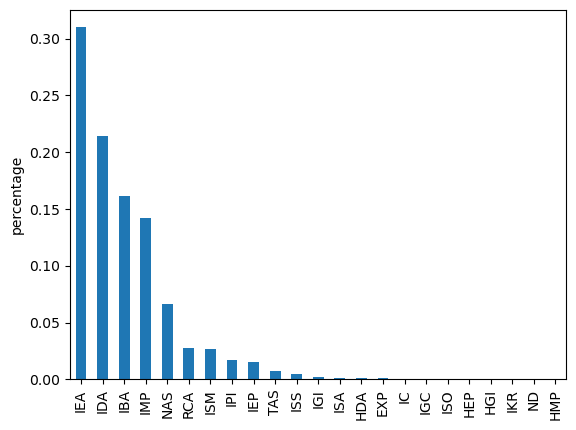

In [228]:
# filter/analyze evidence codes
g = go_annotations_ecoli.evidence_code.value_counts(normalize=True).plot.bar()
g.set_ylabel("percentage")

In [229]:
go_annotations_ecoli = go_annotations_ecoli[go_annotations_ecoli.evidence_code != "IEA"].drop("evidence_code", axis=1).drop_duplicates().reset_index(drop=True)
go_annotations_ecoli

,Uniprot,qualifier,aspect,go_id
0,A5A627,acts_upstream_of_or_within,P,GO:0006950
1,A5A627,acts_upstream_of_or_within,P,GO:0008150
2,A5A627,acts_upstream_of_or_within,P,GO:0050896
3,A5A627,acts_upstream_of_or_within,P,GO:0009987
4,A5A627,acts_upstream_of_or_within,P,GO:0006974
...,...,...,...,...
19059,Q59385,is_active_in,C,GO:0005575
19060,Q59385,located_in,C,GO:0005886
19061,Q59385,located_in,C,GO:0110165
19062,Q59385,located_in,C,GO:0016020


In [232]:
go_annotations_ecoli = go_annotations_ecoli[~go_annotations_ecoli.qualifier.str.startswith("NOT")].reset_index(drop=True)
go_annotations_ecoli

,Uniprot,qualifier,aspect,go_id
0,A5A627,acts_upstream_of_or_within,P,GO:0006950
1,A5A627,acts_upstream_of_or_within,P,GO:0008150
2,A5A627,acts_upstream_of_or_within,P,GO:0050896
3,A5A627,acts_upstream_of_or_within,P,GO:0009987
4,A5A627,acts_upstream_of_or_within,P,GO:0006974
...,...,...,...,...
19048,Q59385,is_active_in,C,GO:0005575
19049,Q59385,located_in,C,GO:0005886
19050,Q59385,located_in,C,GO:0110165
19051,Q59385,located_in,C,GO:0016020


What qualifiers are assigned to the individual aspects?

- Looks good, we can filter later

In [233]:
for aspect in ["C", "P", "F"]:
    print("###",aspect)
    print(go_annotations_ecoli[go_annotations_ecoli.aspect == aspect].qualifier.astype("str").value_counts().to_string())

### C
located_in      2299
part_of          687
is_active_in     473
### P
acts_upstream_of_or_within    5365
involved_in                   4755
### F
enables           5261
contributes_to     213


Annotating the dataset with labels of GO terms:

In [234]:
go_annotations_ecoli = go_annotations_ecoli.assign(go_term = go_annotations_ecoli.go_id.map(go_owl.get_label))
go_annotations_ecoli

,Uniprot,qualifier,aspect,go_id,go_term
0,A5A627,acts_upstream_of_or_within,P,GO:0006950,response to stress
1,A5A627,acts_upstream_of_or_within,P,GO:0008150,biological_process
2,A5A627,acts_upstream_of_or_within,P,GO:0050896,response to stimulus
3,A5A627,acts_upstream_of_or_within,P,GO:0009987,cellular process
4,A5A627,acts_upstream_of_or_within,P,GO:0006974,cellular response to DNA damage stimulus
...,...,...,...,...,...
19048,Q59385,is_active_in,C,GO:0005575,cellular_component
19049,Q59385,located_in,C,GO:0005886,plasma membrane
19050,Q59385,located_in,C,GO:0110165,cellular anatomical entity
19051,Q59385,located_in,C,GO:0016020,membrane


### Keywords

In [281]:
keywords_uniprot = load_df("keywords")
keywords_ecoli = keywords_uniprot[keywords_uniprot.Uniprot.isin(sequences.index)].drop_duplicates().reset_index(drop=True)
keywords_ecoli

,Uniprot,keyword
0,P02916,3D-structure
1,P02916,Cell inner membrane
2,P02916,Cell membrane
3,P02916,Membrane
4,P02916,Reference proteome
...,...,...
3400,P39282,Membrane
3401,P39282,Reference proteome
3402,P39282,Transmembrane
3403,P39282,Transmembrane helix


## Clustering analysis

- Use KMeans etc. to cluster feature data
- Find GO terms etc. that match clusters most closely.

In [135]:
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333


### Kmeans

#### What is the optimal number *k* of clusters?

In [136]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

def cluster_plots(feature_data, min_clusters: int = 2, max_clusters: int = 20):
    """
    - Elbow plot/Inertia: the more it looks like an elbow, the better. the optimal number of clusters is at the "joint of the arm"
    - Silhouette: Number between -1 and 1. The higher the better. Measures tightness/overlap of clusters
    - CH: Higher score is better
    - DB: The closer to 0 the better. Average similarity between any cluster and its closest cluster.
    """
    scores = list()

    for n_clusters in range(min_clusters, max_clusters + 1):
        pipe = make_pipeline(
            StandardScaler(), KMeans(n_clusters=n_clusters, random_state=0)
        )
        pipe.fit(feature_data)
        scores.append([n_clusters, "Inertia", pipe["kmeans"].inertia_])
        scores.append(
            [
                n_clusters,
                "Silhouette Coefficient",
                silhouette_score(feature_data, pipe["kmeans"].labels_),
            ]
        )
        scores.append(
            [
                n_clusters,
                "Calinski Harabasz Index",
                calinski_harabasz_score(feature_data, pipe["kmeans"].labels_),
            ]
        )
        scores.append(
            [
                n_clusters,
                "Davies Bouldin Index",
                davies_bouldin_score(feature_data, pipe["kmeans"].labels_),
            ]
        )

    scores_wide = pd.DataFrame.from_records(scores, columns=["k", "metric", "score"]).pivot(
        index="k", columns="metric", values="score"
    )
    return scores_wide.plot(subplots=True, layout=(2,2), figsize=(15,10), xticks=scores_wide.index)

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

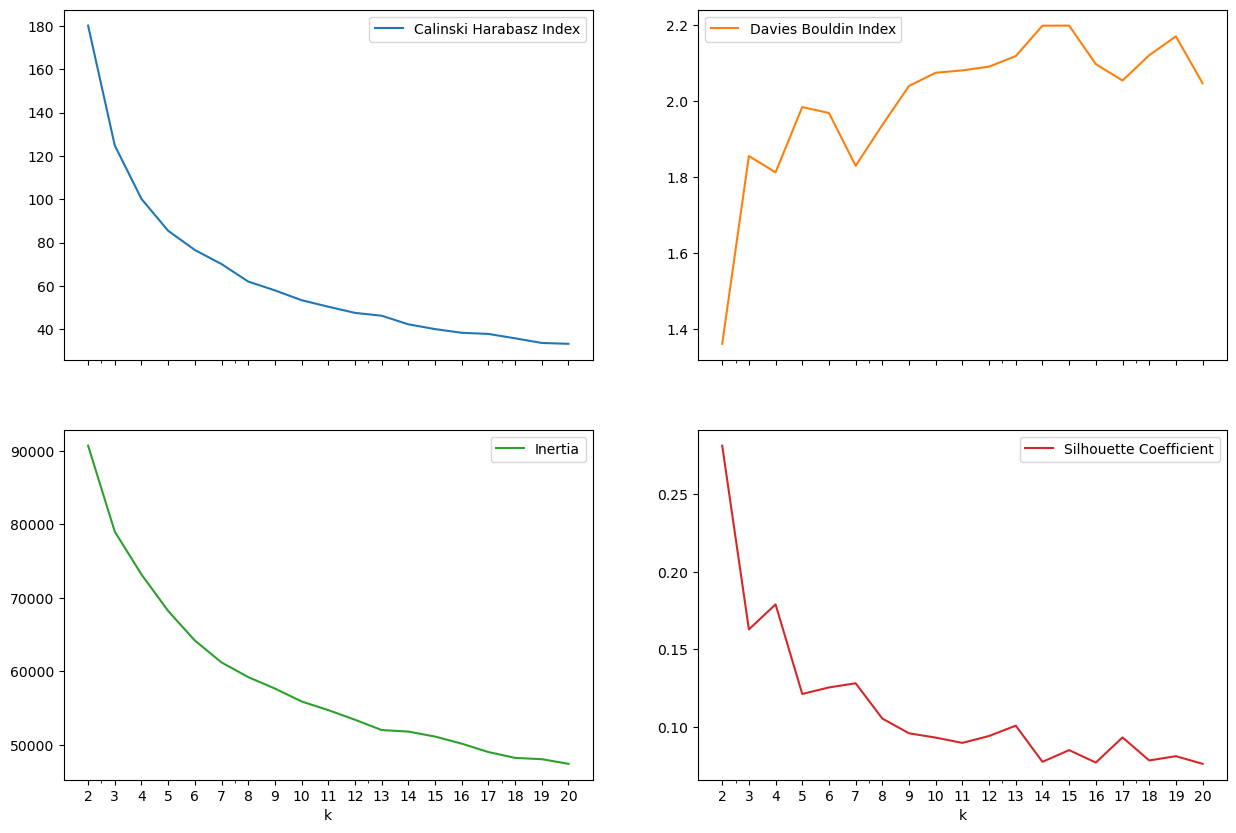

In [137]:
cluster_plots(feature_pssm)

In [138]:
cluster_plots(feature_protnlm)

KeyboardInterrupt: 

It actually looks like PSSM works better! But none of the metrics look particularly good, we should look at a dendrogram.

### Hierarchical clustering

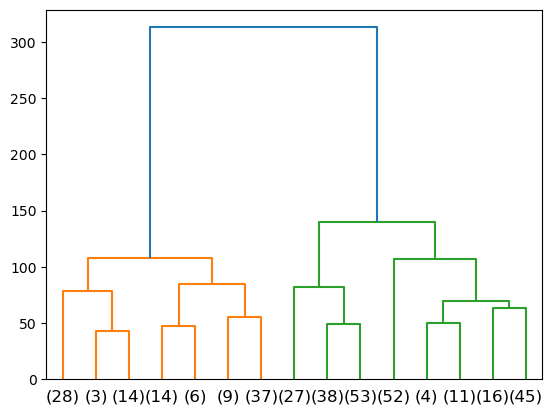

In [283]:
from scipy.cluster import hierarchy
from sklearn.preprocessing import scale
linkage = hierarchy.linkage(scale(feature_pssm), method="ward")
dendrogram = hierarchy.dendrogram(
    linkage, truncate_mode="lastp", p=15
)

#### Analyzing the two clusters

It seems like there are two very obvious clusters. What are they?

In [ ]:
labels = hierarchy.fcluster(linkage, criterion="maxclust", t=2)
labels = pd.Series(data=labels, index=feature_pssm.index)
labels

P02916    2
P03959    2
P05825    1
P0AA78    2
P0AAD6    2
         ..
P77328    2
P76198    2
P33011    2
P37327    2
P39282    2
Length: 357, dtype: int32

In [269]:
# protein sets (accessions)
label1 = set(labels[labels == 1].index.tolist())
label2 = set(labels[labels == 2].index.tolist())
print(len(label1), len(label2))

111 246


#### Enrichment score

In [316]:
# TODO more annotation types, like tcdb or keywords
# TODO include p-value from hypergeometric test
# TODO refactor into method
    # Takes a protein set and a reference set and calculates scores. 


def analyze_cluster_annotations(subset:set, reference_set:set, annotations:pd.DataFrame):
    
    pass

In [235]:
go_label1 = go_annotations_ecoli[go_annotations_ecoli.Uniprot.isin(label1)]
go_label2 = go_annotations_ecoli[go_annotations_ecoli.Uniprot.isin(label2)]

assert len(set(go_label1.Uniprot) & set(go_label2.Uniprot)) == 0

In [305]:
from math import log2
import numpy as np

records = list()

for go_id in set(go_annotations_ecoli.go_id.to_list()):
    values = []
    count1 = go_label1[go_label1.go_id == go_id].Uniprot.unique().shape[0]
    count2 = go_label2[go_label2.go_id == go_id].Uniprot.unique().shape[0]
    values.append(go_id)
    values.append(count1)
    values.append(count2)
    values.append(count1/len(label1))
    values.append(count2/len(label2))
    
    if count1 == 0 and count2 != 0:
        values.append(np.NINF)
    elif count1 != 0 and count2 == 0:
        values.append(np.inf)
    if count2 != 0 and count1 != 0:
        values.append(log2((count1/len(label1))/(count2/len(label2))))
    records.append(values)
df_enr_score = pd.DataFrame.from_records(records, columns=["go_id", "count_cluster1", "count_cluster2", "freq_cluster1", "freq_cluster2", "enrichment_score"])
# df_enr_score["go_term"] = df_enr_score.go_id.transform(go_owl.get_label)
df_enr_score = df_enr_score.sort_values("enrichment_score")
df_enr_score = df_enr_score.merge(go_annotations_ecoli.drop(["Uniprot", "qualifier"], axis=1), how="inner", on="go_id").drop_duplicates().reset_index(drop=True)
df_enr_score

,go_id,count_cluster1,count_cluster2,freq_cluster1,freq_cluster2,enrichment_score,aspect,go_term
0,GO:0015503,0,1,0.000000,0.004065,-inf,F,glutathione-regulated potassium exporter activity
1,GO:0000160,0,1,0.000000,0.004065,-inf,P,phosphorelay signal transduction system
2,GO:0022832,0,1,0.000000,0.004065,-inf,F,voltage-gated channel activity
3,GO:1900190,0,1,0.000000,0.004065,-inf,P,regulation of single-species biofilm formation
4,GO:0005262,0,1,0.000000,0.004065,-inf,F,calcium channel activity
...,...,...,...,...,...,...,...,...
1336,GO:0044419,3,0,0.027027,0.000000,inf,P,biological process involved in interspecies in...
1337,GO:0098630,1,0,0.009009,0.000000,inf,P,aggregation of unicellular organisms
1338,GO:0006497,1,0,0.009009,0.000000,inf,P,protein lipidation
1339,GO:0042710,1,0,0.009009,0.000000,inf,P,biofilm formation


Could it be the case that cluster 1 contains many proteins that are in active transport complexes?

In [308]:
df_enr_score[(df_enr_score.aspect == "C")&(df_enr_score.count_cluster1 + df_enr_score.count_cluster2 > 10)].round(2)

,go_id,count_cluster1,count_cluster2,freq_cluster1,freq_cluster2,enrichment_score,aspect,go_term
564,GO:0005886,63,222,0.57,0.90,-0.67,C,plasma membrane
640,GO:0016020,88,228,0.79,0.93,-0.23,C,membrane
661,GO:0110165,99,235,0.89,0.96,-0.10,C,cellular anatomical entity
676,GO:0005575,111,245,1.00,1.00,0.01,C,cellular_component
777,GO:0043190,28,49,0.25,0.20,0.34,C,ATP-binding cassette (ABC) transporter complex
781,GO:0098533,30,51,0.27,0.21,0.38,C,ATPase dependent transmembrane transport complex
783,GO:0098797,34,57,0.31,0.23,0.40,C,plasma membrane protein complex
800,GO:1990351,51,79,0.46,0.32,0.52,C,transporter complex
801,GO:1902495,50,77,0.45,0.31,0.53,C,transmembrane transporter complex
829,GO:0032991,63,92,0.57,0.37,0.60,C,protein-containing complex


In [313]:
df_enr_score[(df_enr_score.aspect == "F")&(df_enr_score.count_cluster1 + df_enr_score.count_cluster2 > 50)].round(2)

,go_id,count_cluster1,count_cluster2,freq_cluster1,freq_cluster2,enrichment_score,aspect,go_term
507,GO:0015291,12,76,0.11,0.31,-1.51,F,secondary active transmembrane transporter act...
508,GO:0015293,7,44,0.06,0.18,-1.50,F,symporter activity
558,GO:0022853,18,69,0.16,0.28,-0.79,F,active ion transmembrane transporter activity
570,GO:0015078,12,41,0.11,0.17,-0.62,F,proton transmembrane transporter activity
571,GO:0022890,20,68,0.18,0.28,-0.62,F,inorganic cation transmembrane transporter act...
573,GO:0008324,28,94,0.25,0.38,-0.60,F,cation transmembrane transporter activity
579,GO:0008514,15,49,0.14,0.20,-0.56,F,organic anion transmembrane transporter activity
607,GO:0015075,42,126,0.38,0.51,-0.44,F,ion transmembrane transporter activity
618,GO:0022804,42,124,0.38,0.50,-0.41,F,active transmembrane transporter activity
621,GO:0008509,20,58,0.18,0.24,-0.39,F,anion transmembrane transporter activity


In [315]:
df_enr_score[(df_enr_score.aspect == "P")&(df_enr_score.count_cluster1 + df_enr_score.count_cluster2 > 30)].round(2)

,go_id,count_cluster1,count_cluster2,freq_cluster1,freq_cluster2,enrichment_score,aspect,go_term
569,GO:0006865,11,38,0.10,0.15,-0.64,P,amino acid transport
619,GO:0006820,26,76,0.23,0.31,-0.40,P,anion transport
620,GO:0015711,23,67,0.21,0.27,-0.39,P,organic anion transport
625,GO:0098656,16,45,0.14,0.18,-0.34,P,anion transmembrane transport
630,GO:0015849,20,54,0.18,0.22,-0.28,P,organic acid transport
631,GO:0046942,20,54,0.18,0.22,-0.28,P,carboxylic acid transport
635,GO:0071705,34,90,0.31,0.37,-0.26,P,nitrogen compound transport
641,GO:0071702,64,164,0.58,0.67,-0.21,P,organic substance transport
642,GO:0003333,9,23,0.08,0.09,-0.21,P,amino acid transmembrane transport
653,GO:0006810,90,216,0.81,0.88,-0.11,P,transport


#### Hypergeometric test


Filtering the GO table

In [270]:
from scipy.stats import hypergeom

# TODO test
def hypergeom_go(test_set, annotation, go_all):
    # we have M proteins
    M = go_all.Uniprot.unique().shape[0]
    # n are annotated with the annotation
    n = go_all[go_all.go_term == annotation].Uniprot.unique().shape[0]
    # we draw N proteins 
    assert isinstance(test_set, set), "test_set has to be set"
    N = len(test_set)
    # among the N proteins, there are X proteins with the annotation
    X = go_all[(go_all.go_term == annotation) & (go_all.Uniprot.isin(test_set))].Uniprot.unique().shape[0]
    if X == 0: 
        # The function would return 0.0 if X is 0, which would be misleading.
        return None
    else:
        # what is the probability that X or more genes that were randomly selected have that probability?
        return hypergeom(M,n,N).sf(X)


In [271]:
hypergeom_go(label1, "cell outer membrane", go_annotations_ecoli)

1.2321077495201222e-10

In [276]:
print(sequences.loc[list(label1)].protein_names.to_string())

Uniprot
P39301    Ascorbate-specific PTS system EIIC component (...
P0AC98    Succinate-acetate/proton symporter SatP (Succi...
P0AA76    D-galactonate transporter (D-galactonate/H(+) ...
P76773                                           Porin OmpL
P69874    Spermidine/putrescine import ATP-binding prote...
P33590                   Nickel-binding periplasmic protein
P37313    Dipeptide transport ATP-binding protein DppF (...
P07109         Histidine transport ATP-binding protein HisP
P75757                                Zinc transporter ZitB
P10907    sn-glycerol-3-phosphate import ATP-binding pro...
P76425                     Nickel/cobalt efflux system RcnA
P0ABJ1    Cytochrome bo(3) ubiquinol oxidase subunit 2 (...
P15993    Aromatic amino acid transport protein AroP (Ar...
P60844    Aquaporin Z (Bacterial nodulin-like intrinsic ...
P06996    Outer membrane porin C (Outer membrane protein...
P02930    Outer membrane protein TolC (Multidrug efflux ...
P42915                    Outer 